<a href="https://colab.research.google.com/github/TanviSawant94/Black-Friday-Sales/blob/main/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
train_df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


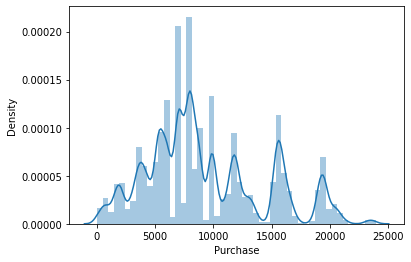

In [ ]:
sns.distplot(train_df['Purchase'])

In [ ]:
print("Skewness: %f" % df['Purchase'].skew())
print("Kurtosis: %f" % df['Purchase'].kurt())

Skewness: 0.600140
Kurtosis: -0.338378


In [ ]:
df2 = train_df.loc[:, ['User_ID', 'Purchase']]
df2 = df2.groupby(['User_ID']).sum()[['Purchase']]

In [ ]:
df2 = df2.reset_index()

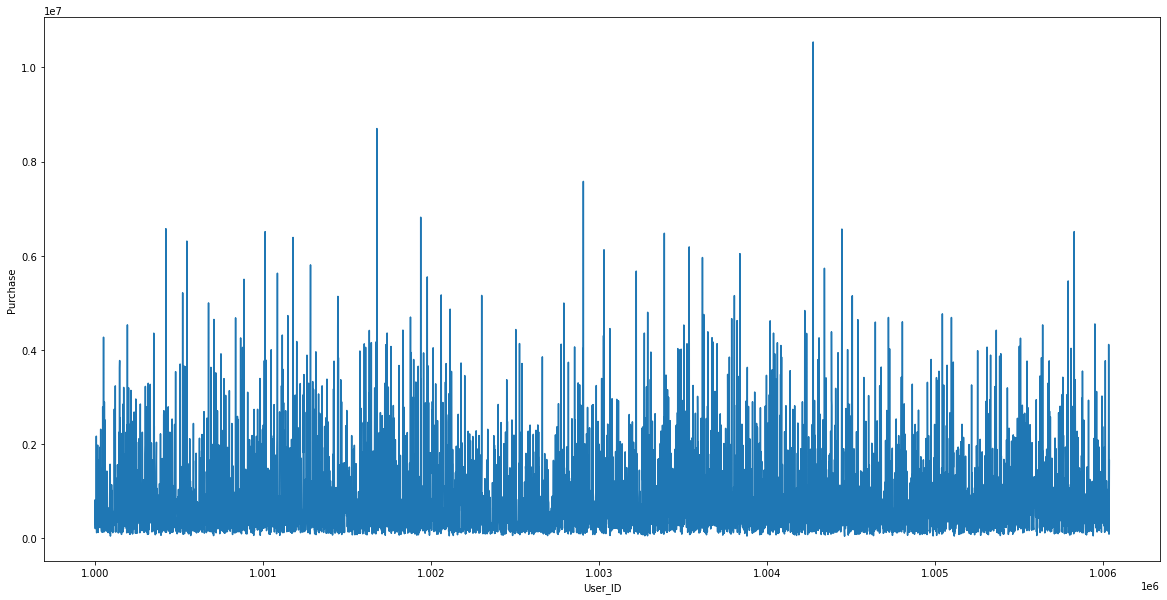

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df2, x="User_ID", y="Purchase", ax=ax)

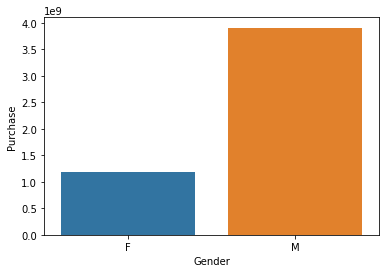

In [ ]:
sns.barplot(data=train_df.groupby(['Gender']).sum().reset_index(), x='Gender', y='Purchase')

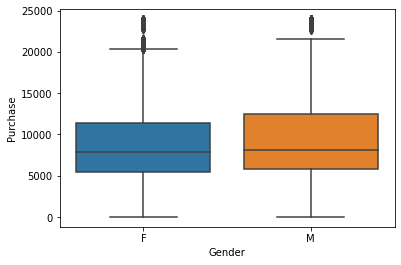

In [ ]:
sns.boxplot(data=train_df, x='Gender', y='Purchase')

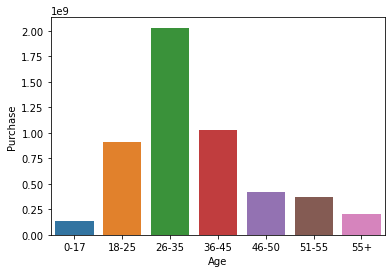

In [ ]:
sns.barplot(data=train_df.groupby(['Age']).sum().reset_index(), x='Age', y='Purchase')

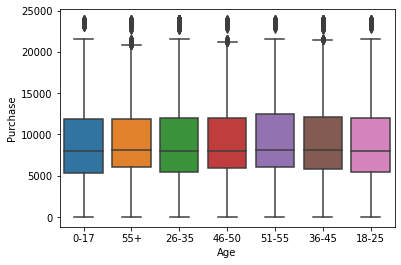

In [ ]:
sns.boxplot(data=train_df, x='Age', y='Purchase')

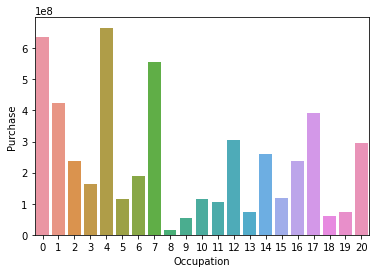

In [ ]:
sns.barplot(data=train_df.groupby(['Occupation']).sum().reset_index(), x='Occupation', y='Purchase')

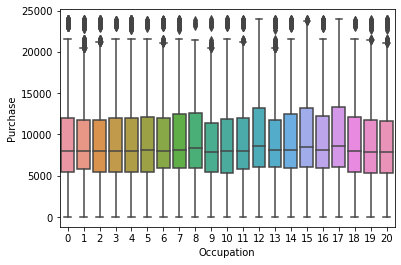

In [ ]:
sns.boxplot(data=train_df, x='Occupation', y='Purchase')

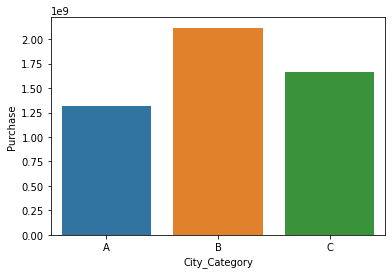

In [ ]:
sns.barplot(data=train_df.groupby(['City_Category']).sum().reset_index(), x='City_Category', y='Purchase')

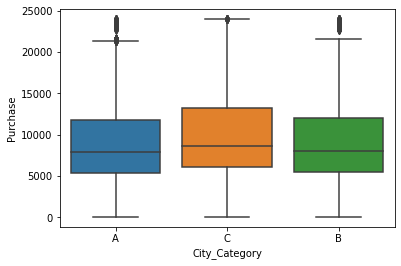

In [ ]:
sns.boxplot(data=train_df, x='City_Category', y='Purchase')

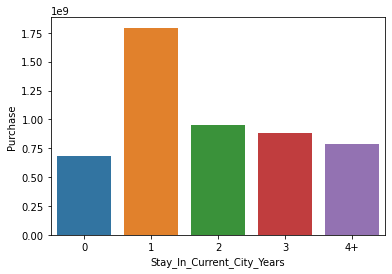

In [ ]:
sns.barplot(data=train_df.groupby(['Stay_In_Current_City_Years']).sum().reset_index(), x='Stay_In_Current_City_Years', y='Purchase')

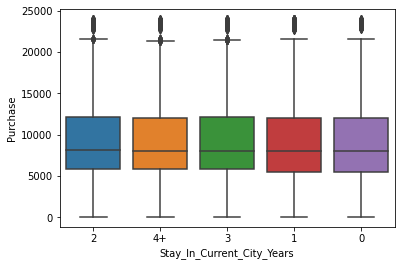

In [ ]:
sns.boxplot(data=train_df, x='Stay_In_Current_City_Years', y='Purchase')

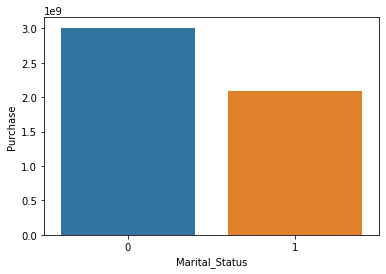

In [ ]:
sns.barplot(data=train_df.groupby(['Marital_Status']).sum().reset_index(), x='Marital_Status', y='Purchase')

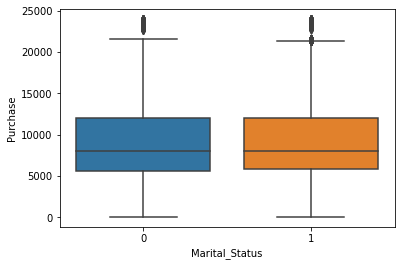

In [ ]:
sns.boxplot(data=train_df, x='Marital_Status', y='Purchase')

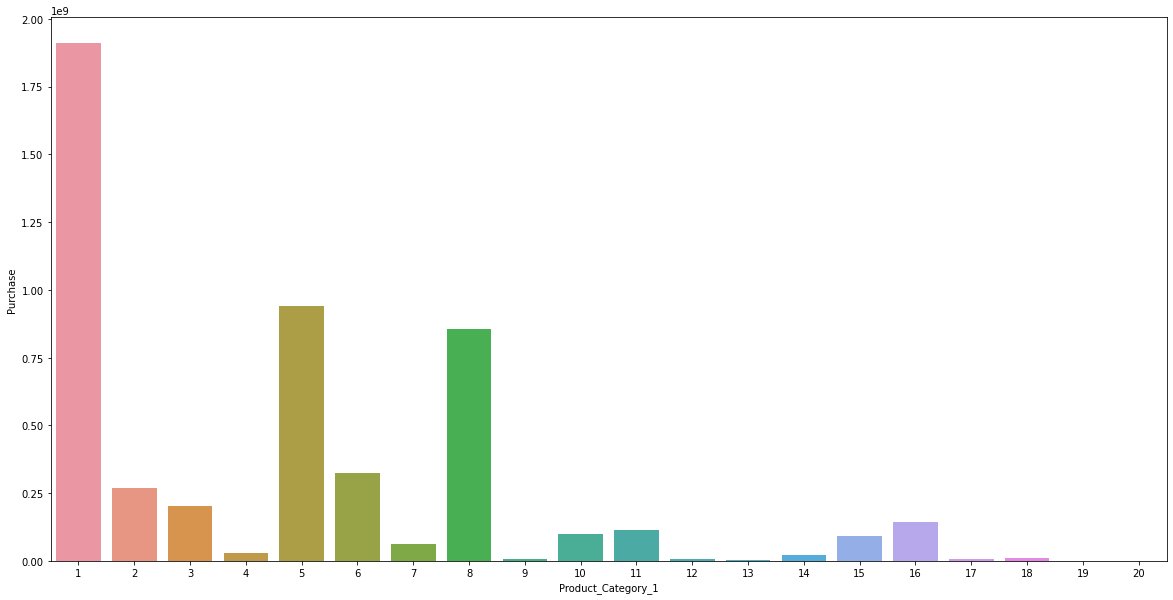

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=train_df.groupby(['Product_Category_1']).sum().reset_index(), x='Product_Category_1', y='Purchase', ax=ax)

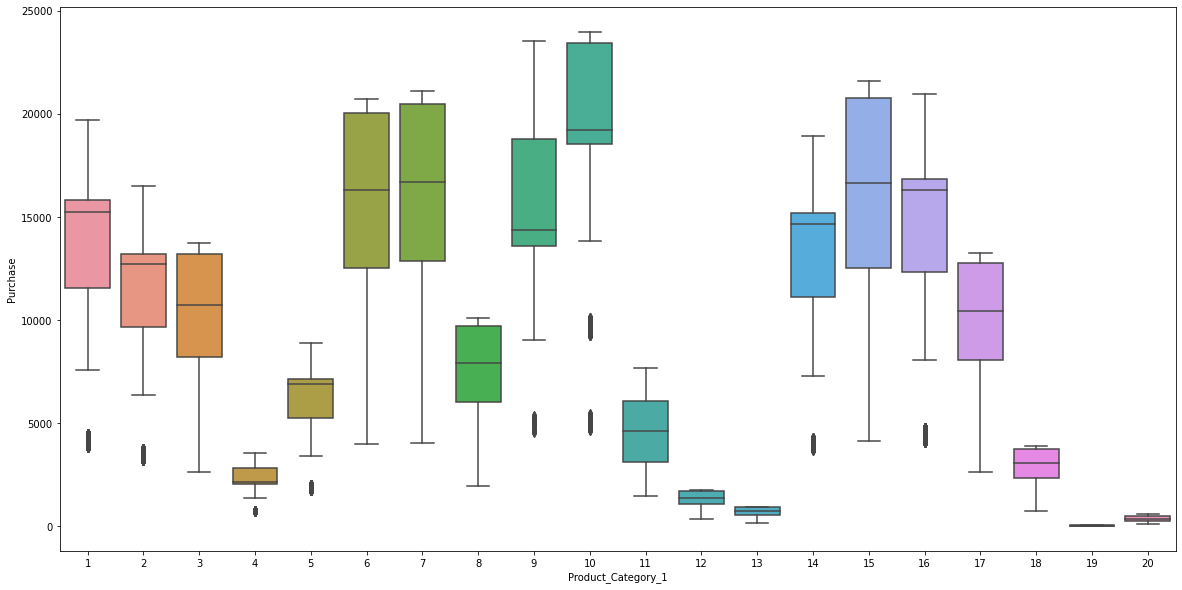

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=train_df, x='Product_Category_1', y='Purchase', ax=ax)

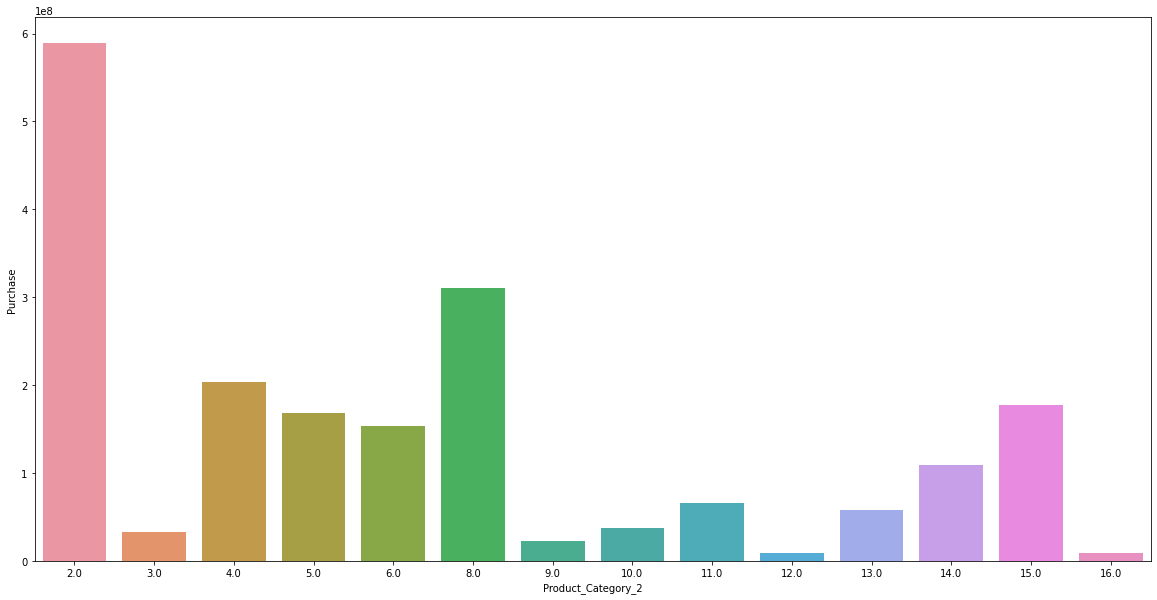

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=train_df.dropna().groupby(['Product_Category_2']).sum().reset_index(), x='Product_Category_2', y='Purchase', ax=ax)

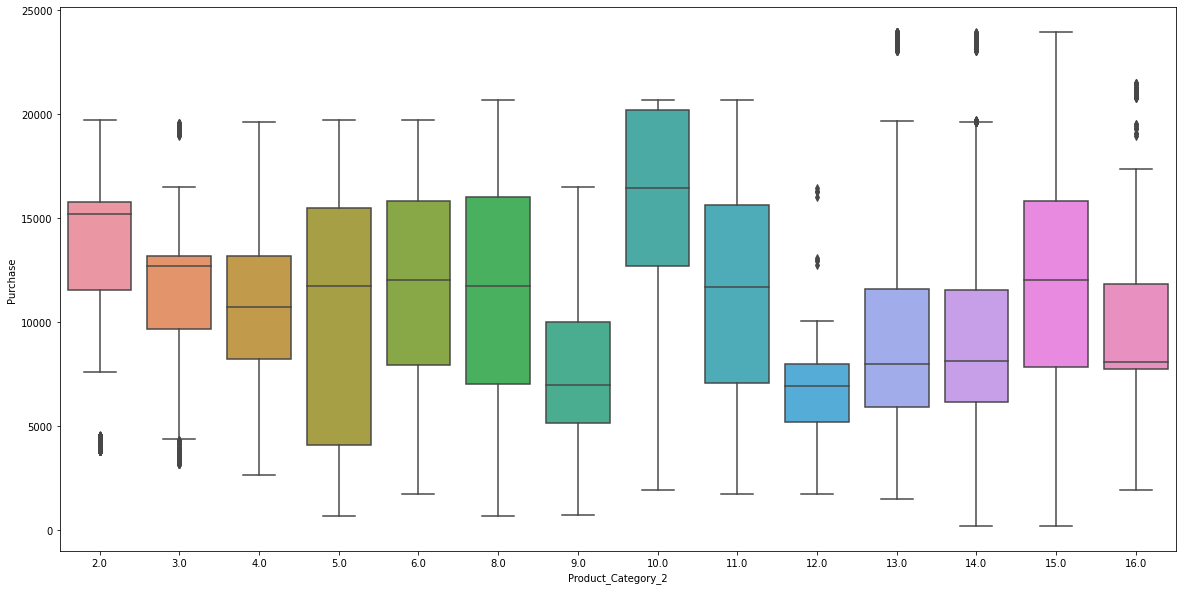

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=train_df.dropna(), x='Product_Category_2', y='Purchase', ax=ax)

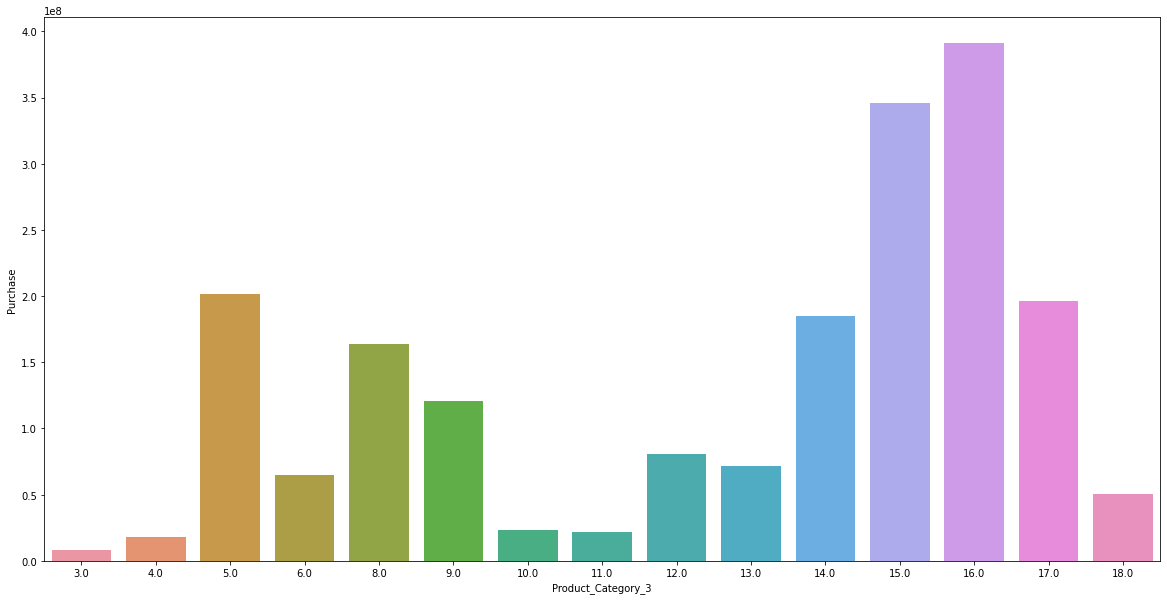

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=train_df.dropna().groupby(['Product_Category_3']).sum().reset_index(), x='Product_Category_3', y='Purchase', ax=ax)

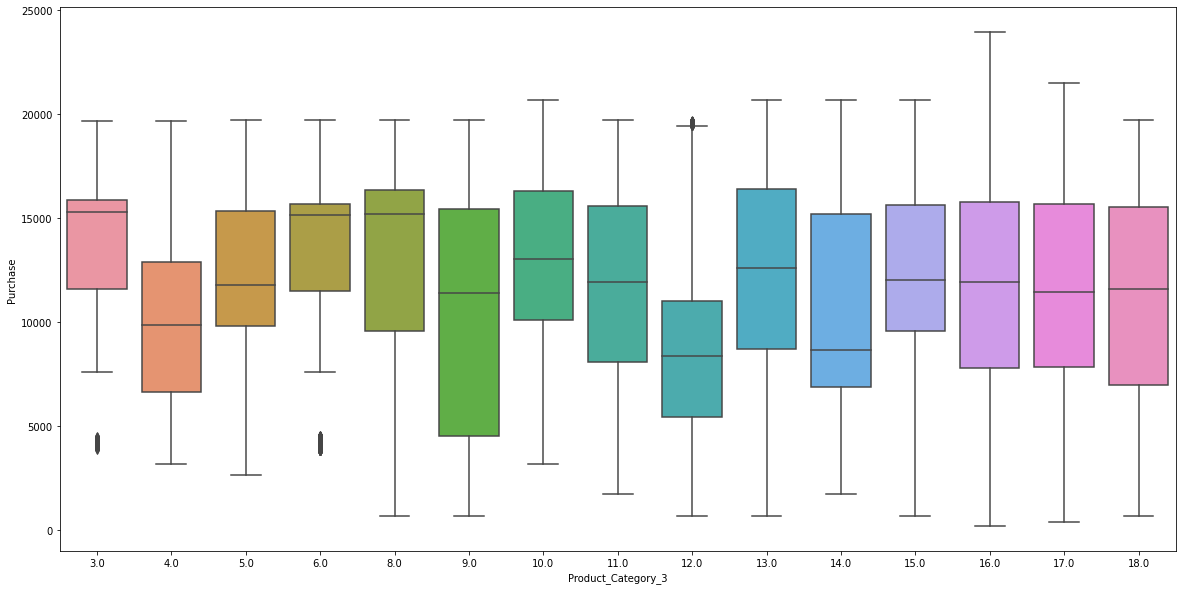

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=train_df.dropna(), x='Product_Category_3', y='Purchase', ax=ax)

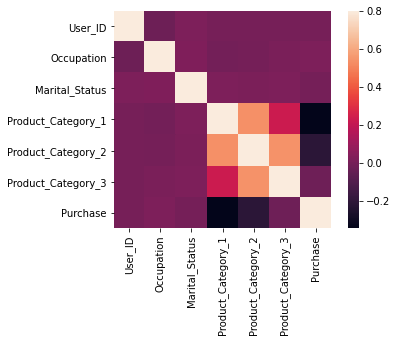

In [ ]:
sns.heatmap(train_df.corr(), vmax=.8, square=True)

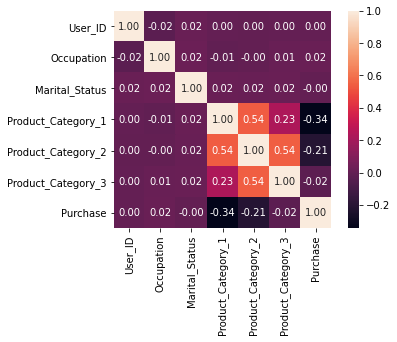

In [ ]:
sns.heatmap(train_df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In [ ]:
train_df = train_df.fillna(0)

In [ ]:
test_df = test_df.fillna(0)

In [ ]:
from scipy import stats
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


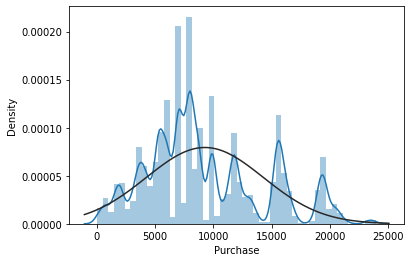

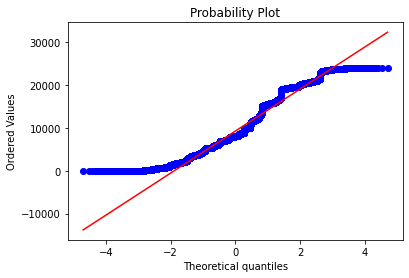

In [ ]:
sns.distplot(train_df['Purchase'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Purchase'], plot=plt)

In [ ]:
train_df['Gender'] = train_df['Gender'].replace({'M': 0, 'F': 1})
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,0,55+,16,C,4+,0,8,0.0,0.0,7969


In [ ]:
test_df['Gender'] = test_df['Gender'].replace({'M': 0, 'F': 1})
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,0,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,0,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,1,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,1,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,1,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
train_df['Age'] = train_df['Age'].replace({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6})
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,1,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,0,6,16,C,4+,0,8,0.0,0.0,7969


In [ ]:
test_df['Age'] = test_df['Age'].replace({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6})

In [ ]:
train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,1,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,0,6,16,C,4,0,8,0.0,0.0,7969


In [ ]:
test_df['Stay_In_Current_City_Years'] = test_df['Stay_In_Current_City_Years'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})

In [ ]:
df2 = pd.get_dummies(train_df['City_Category'])
df2.drop(['A'], axis=1, inplace=True)
df2.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
train_df = pd.concat([train_df, df2], axis=1)
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,1,0,10,A,2,0,3,0.0,0.0,8370,0,0
1,1000001,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,1,0,10,A,2,0,12,0.0,0.0,1422,0,0
3,1000001,P00085442,1,0,10,A,2,0,12,14.0,0.0,1057,0,0
4,1000002,P00285442,0,6,16,C,4,0,8,0.0,0.0,7969,0,1


In [ ]:
df2 = pd.get_dummies(test_df['City_Category'])
df2.drop(['A'], axis=1, inplace=True)
df2.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
test_df = pd.concat([test_df, df2], axis=1)
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000004,P00128942,0,4,7,B,2,1,1,11.0,0.0,1,0
1,1000009,P00113442,0,2,17,C,0,0,3,5.0,0.0,0,1
2,1000010,P00288442,1,3,1,B,4,1,5,14.0,0.0,1,0
3,1000010,P00145342,1,3,1,B,4,1,4,9.0,0.0,1,0
4,1000011,P00053842,1,2,1,C,1,0,4,5.0,12.0,0,1


In [ ]:
train_df.drop(['User_ID', 'Product_ID', 'City_Category'], axis=1, inplace=True)
train_df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,0,10,2,0,3,0.0,0.0,8370,0,0
1,1,0,10,2,0,1,6.0,14.0,15200,0,0
2,1,0,10,2,0,12,0.0,0.0,1422,0,0
3,1,0,10,2,0,12,14.0,0.0,1057,0,0
4,0,6,16,4,0,8,0.0,0.0,7969,0,1


In [ ]:
test_df.drop(['User_ID', 'Product_ID', 'City_Category'], axis=1, inplace=True)
test_df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,4,7,2,1,1,11.0,0.0,1,0
1,0,2,17,0,0,3,5.0,0.0,0,1
2,1,3,1,4,1,5,14.0,0.0,1,0
3,1,3,1,4,1,4,9.0,0.0,1,0
4,1,2,1,1,0,4,5.0,12.0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
df2 = train_df[['Purchase']]
df3 = sc.fit_transform(df2)
train_df[['Purchase_SC']] = df3
train_df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,Purchase_SC
0,1,0,10,2,0,3,0.0,0.0,8370,0,0,-0.177973
1,1,0,10,2,0,1,6.0,14.0,15200,0,0,1.181756
2,1,0,10,2,0,12,0.0,0.0,1422,0,0,-1.561193
3,1,0,10,2,0,12,14.0,0.0,1057,0,0,-1.633858
4,0,6,16,4,0,8,0.0,0.0,7969,0,1,-0.257805


In [ ]:
train_df.drop(['Purchase'], axis=1, inplace=True)

In [ ]:
X_train = train_df.drop(['Purchase_SC'], axis=1).values
Y_train = train_df.loc[:, 'Purchase_SC'].values

In [ ]:
X_test = test_df.values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
regressor.predict([X_train[0]])

array([0.0712377])

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
df3 = sc.inverse_transform(Y_pred)
df2 = pd.DataFrame(df3)
df2.head()

,0
0,17606.056667
1,10438.666667
2,8363.960534
3,2107.733333
4,3018.833333


In [ ]:
df4 = pd.read_csv('test.csv')
df4.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df4 = df4[['User_ID', 'Product_ID']]
df4.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [ ]:
df4 = pd.concat([df2, df4], axis=1)
df4.columns = ['Purchase', 'User_ID', 'Product_ID']
df4.head()

,Purchase,User_ID,Product_ID
0,17606.056667,1000004,P00128942
1,10438.666667,1000009,P00113442
2,8363.960534,1000010,P00288442
3,2107.733333,1000010,P00145342
4,3018.833333,1000011,P00053842


In [ ]:
df4.to_csv('output.csv', index=False)

In [ ]:
Y_pred = regressor.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_train, Y_pred))

0.47361294392461395

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 62.16 %
Standard Deviation: 1.53 %
